In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats 

In [106]:
df=pd.read_csv("C:/Users/adith/Desktop/kuiper.csv")

In [107]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,NaN,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,NaN,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


# Q1) Is the relationship significant?

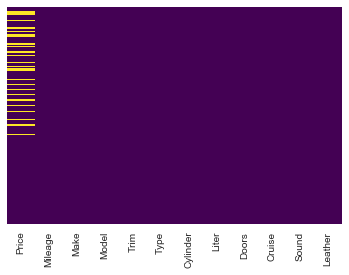

In [108]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [109]:
#Roughly 10 percent of the Price data is missing.The proportion of Price missing is likely small enough for
#reasonable replacement with some form of imputation.

# Q2)Model Assumptions Violation check

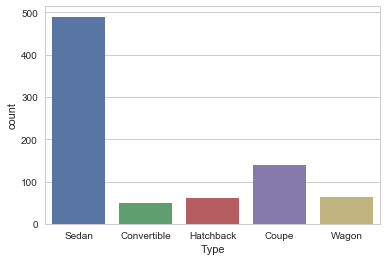

In [110]:
sns.set_style('whitegrid')
sns.countplot(x='Type',data=df)

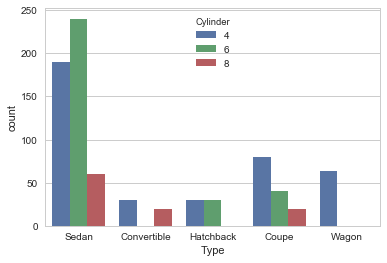

In [111]:
sns.set_style('whitegrid')
sns.countplot(x='Type',hue='Cylinder',data=df)

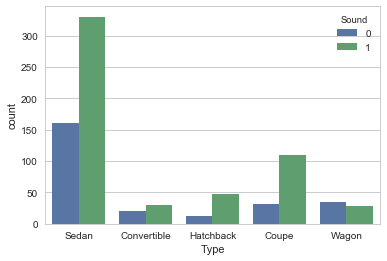

In [112]:
sns.set_style('whitegrid')
sns.countplot(x='Type',hue='Sound',data=df)

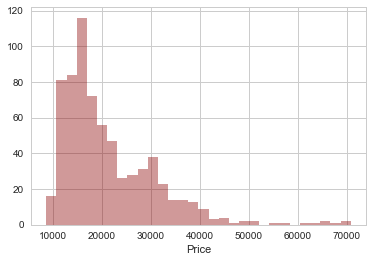

In [113]:
sns.distplot(df['Price'].dropna(),kde=False,color='darkred',bins=30)

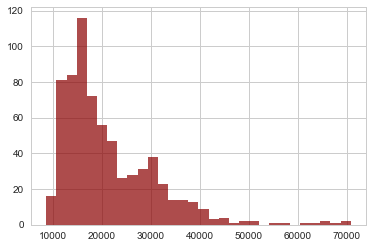

In [114]:
df['Price'].hist(bins=30,color='darkred',alpha=0.7)

# Data Cleaning

In [115]:

##We want to fill in missing price data instead of just dropping the 
##missing price data rows. One way to do this is by filling in the mean 
##price of all the cars (imputation).We can check the average price by car's cylinder'. For example:

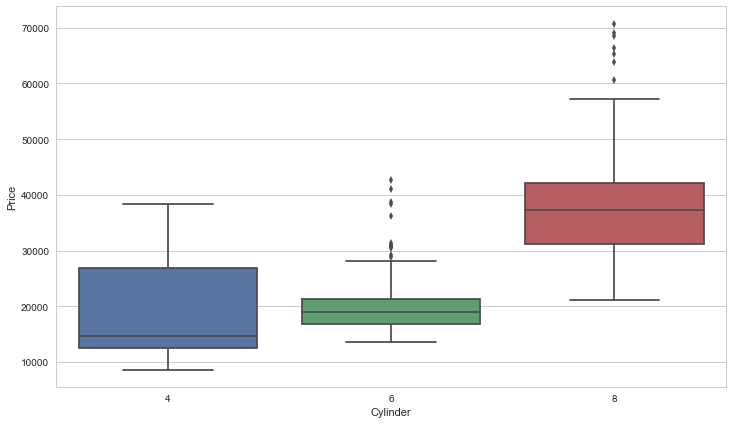

In [116]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Cylinder',y='Price',data=df)

# Cross validation

In [117]:
def impute_price(cols):
    Price=cols[0]
    Cylinder=cols[1]
    
    if pd.isnull(Price):
    
        if Cylinder == 4:
            return 14000
        elif Cylinder == 6:
            return 19000
        else:
            return 39000
    else:
        return Price
        

In [118]:
df['Price'] = df[['Price','Cylinder']].apply(impute_price,axis=1)

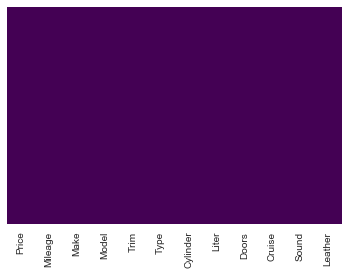

In [119]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [120]:
#We dont have any null values.Data seems to be clean

In [121]:
#Converting Categorical Features

In [122]:
type1 = pd.get_dummies(df['Type'],prefix='type',drop_first=True)
cylinder = pd.get_dummies(df['Cylinder'],prefix='Cylinder',drop_first=True)

In [123]:
df.drop(['Make','Model','Trim','Type','Liter'],axis=1,inplace=True)

In [124]:
df = pd.concat([df,type1,cylinder],axis=1)

In [125]:
df.head(10)

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,type_Coupe,type_Hatchback,type_Sedan,type_Wagon,Cylinder_6,Cylinder_8
0,17314.10313,8221,6,4,1,1,1,0,0,1,0,1,0
1,17542.03608,9135,6,4,1,1,0,0,0,1,0,1,0
2,16218.84786,13196,6,4,1,1,0,0,0,1,0,1,0
3,19000.00000,16342,6,4,1,0,0,0,0,1,0,1,0
4,19000.00000,19832,6,4,1,0,1,0,0,1,0,1,0
5,15709.05282,22236,6,4,1,1,0,0,0,1,0,1,0
6,15230.00339,22576,6,4,1,1,0,0,0,1,0,1,0
7,15048.04218,22964,6,4,1,1,0,0,0,1,0,1,0
8,14862.09387,24021,6,4,1,0,1,0,0,1,0,1,0
9,15295.01827,27325,6,4,1,1,1,0,0,1,0,1,0


In [128]:
pred = df.columns[1:]
pred

Index(['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather',
       'type_Coupe', 'type_Hatchback', 'type_Sedan', 'type_Wagon',
       'Cylinder_6', 'Cylinder_8', 'intercept'],
      dtype='object')

In [129]:
# Building a Logistic Regression model

##splitting the data into a training set and test set

## Train Test Split

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Cylinder',axis=1), 
                                                    df['Cylinder'], test_size=0.30, 
                                                    random_state=101)

In [132]:
#Training and Predicting

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [135]:
predictions = logmodel.predict(x_test)

## Evaluation

In [137]:
from sklearn.metrics import classification_report

In [138]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          4       0.97      0.97      0.97       117
          6       1.00      1.00      1.00        95
          8       0.90      0.87      0.88        30

avg / total       0.97      0.97      0.97       242



# Accuracy score

In [139]:
from sklearn import metrics
y_train = logmodel.predict(x_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_train))

Accuracy score using Logistic regression is 0.971074380165
